In [1]:
import os
from string import digits

import numpy as np
import scipy
#import Image
#import kiwisolver
import matplotlib #Had to reinstall Pillow 
import matplotlib.pyplot as plt
import seaborn

import re

import sys
import pandas
import random
import math

import sklearn
#from sklearn.model_selection import metrics
from sklearn import linear_model
from sklearn.model_selection import cross_validate
#from sklearn.cross_validation import cross_val_score
#from sklearn.model_selection import metrics

import time,datetime
from mpl_toolkits import mplot3d
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch
from matplotlib.font_manager import FontProperties
from matplotlib import cm

from operator import itemgetter
import logomaker
import pickle

In [2]:
sorted(np.arange(0.01,0.05,0.002),reverse=True)

[0.048,
 0.046000000000000006,
 0.044000000000000004,
 0.042,
 0.04,
 0.038,
 0.036000000000000004,
 0.034,
 0.032,
 0.03,
 0.028000000000000004,
 0.026000000000000002,
 0.024,
 0.022,
 0.02,
 0.018000000000000002,
 0.016,
 0.014,
 0.012,
 0.01]

In [3]:
class Sequence:
    
    def __init__(self):
        self.seq=""
        self.name=""
        self.file=""
        self.alngroup=""
        
    def GiveName(self,N):
        self.name = N
    
    def GiveSeq (self,SEQ):
        self.seq = SEQ
    
    def GiveFile(self,F):
        self.file = F
        
    def GiveAln(self,A):
        self.alngroup = A
    

In [4]:
def ReadIn(f,GeneTag=''):
    S=[]
    total = 0
    unique = 0
    

    blump = 0
    fin = open(f,'r')
    #line = fin.readline()
    for line in fin:
        if line[0] == '>':
            if blump > 0:
                AddHere = Sequence()
                AddHere.GiveSeq(nuc)
                AddHere.GiveName(NAME)
                AddHere.GiveFile(f)
                S.append(AddHere)
                #seqs[name] = nuc #Push previous sequence
            total+=1 
            nuc = ''
            blump = 1
            prename = line[1:].replace(' ','_').strip('\n').strip('\r')

           
            #N=name.split('_')
            #print(N)
            #N0=N[0]
            #N1=N[1]
            #N1="ENS"+N1#Should be more similar to prename from previous version
            if GeneTag !='':
                prename=GeneTag+'_'+prename
            NAME=prename


            #print(prename.translate(table))
            #if N1.translate(table)[:-1] in ensembl.keys():
             #   name = ensembl[N1.translate(table)[:-1]]+'_' + N0 + '_' + N1
            #else:
             #   name = N0 + '_' + N1
        else:
            nuc+=line.strip('\n').strip('\r')
    #if name not in seqs.keys():
        #seqs[name] = nuc #Push the final sequence
    AddHere = Sequence()
    AddHere.GiveSeq(nuc)
    AddHere.GiveName(NAME)
    AddHere.GiveFile(f)
    S.append(AddHere)
    fin.close()
    return(S)

   

In [5]:
def SimpMult(A,B):
    X=0.0
    for i in np.arange(len(A)):
        X+=A[i]*B[i]
        
    return(X)
    

In [6]:
np.exp(1)

2.718281828459045

In [7]:
def LogitEst(V1,V2,c):
    polynom = SimpMult(V1,V2)+c
    Ans=1/(1+np.exp(-1*polynom))
    return(Ans)

In [8]:
#codes = ['-','A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
#         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

#def create_dict(codes):
#    char_dict = {}
#    for index, val in enumerate(codes):
#        char_dict[val] = index+1

#    return char_dict

#char_dict = create_dict(codes)

#char_dict

In [9]:
#Cite this function?
def draw_logo(all_scores, fontfamily='Arial', size=80):
    if fontfamily == 'xkcd':
        plt.xkcd()
    else:
        matplotlib.rcParams['font.family'] = fontfamily

    fig, ax = plt.subplots(figsize=(len(all_scores), 2.5))

    font = FontProperties()
    font.set_size(size)
    font.set_weight('bold')
    
    #font.set_family(fontfamily)

    ax.set_xticks(range(1,len(all_scores)+1))    
    ax.set_yticks(range(0,3))
    ax.set_xticklabels(range(1,len(all_scores)+1), rotation=90)
    ax.set_yticklabels(np.arange(0,3,1))    
    seaborn.despine(ax=ax, trim=True)
    
    trans_offset = transforms.offset_copy(ax.transData, 
                                          fig=fig, 
                                          x=1, 
                                          y=0, 
                                          units='dots')
   
    for index, scores in enumerate(all_scores):
        yshift = 0
        for base, score in scores:
            txt = ax.text(index+1, 
                          0, 
                          base, 
                          transform=trans_offset,
                          fontsize=80, 
                          color=COLOR_SCHEME[base],
                          ha='center',
                          fontproperties=font,

                         )
            txt.set_path_effects([Scale(1.0, score)])
            fig.canvas.draw()
            window_ext = txt.get_window_extent(txt._renderer)
            yshift = window_ext.height*score
            trans_offset = transforms.offset_copy(txt._transform, 
                                                  fig=fig,
                                                  y=yshift,
                                                  units='points')
        trans_offset = transforms.offset_copy(ax.transData, 
                                              fig=fig, 
                                              x=1, 
                                              y=0, 
                                              units='points')    
    plt.show()

In [10]:
os.chdir(r'C:\Users\alber\OneDrive\Documents\Swanson_2017Onward\Sequences\ZP_Alignments')


In [11]:
#Basic mapper
residues = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
           'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

mapper = dict(zip(residues, [[1.0 if residues[i] == r else 0.0 for i in range(len(residues))] for r in residues]))
mapper['-'] = [0.0]*20


In [12]:
PCADat = open('AminoAcid_8PCACodes.txt','r')

mapper2={}
for pca in PCADat:
    SP = pca.split('\t')
    AAn=(SP[0][len(SP[0])-1])
    V =[]
    for i in np.arange(len(SP)):
        if i>0:
            Vi = float(SP[i].strip('\n'))
            V.append(Vi)
    #print(AAn,V)
    mapper2[AAn]=V

mapper2['-']=[0.0]*8 #Must make by 8. Previously had 5
PCADat.close()

mapper2

{'A': [0.15, -1.11, -1.35, -0.92, 0.02, -0.91, 0.36, -0.48],
 'R': [-1.47, 1.45, 1.24, 1.27, 1.55, 1.47, 1.3, 0.83],
 'N': [-0.99, 0.0, -0.37, 0.69, -0.55, 0.85, 0.73, -0.8],
 'D': [-1.15, 0.67, -0.41, -0.01, -2.68, 1.31, 0.03, 0.56],
 'C': [0.18, -1.67, -0.46, -0.21, 0.0, 1.2, -1.61, -0.19],
 'Q': [-0.96, 0.12, 0.18, 0.16, 0.09, 0.42, -0.2, -0.41],
 'E': [-1.18, 0.4, 0.1, 0.36, -2.16, -0.17, 0.91, 0.02],
 'G': [-0.2, -1.53, -2.63, 2.28, -0.53, -1.18, 2.01, -1.34],
 'H': [-0.43, -0.25, 0.37, 0.19, 0.51, 1.28, 0.93, 0.65],
 'I': [1.27, -0.14, 0.3, -1.8, 0.3, -1.61, -0.16, -0.13],
 'L': [1.36, 0.07, 0.26, -0.8, 0.22, -1.37, 0.08, -0.62],
 'K': [-1.17, 0.7, 0.7, 0.8, 1.64, 0.67, 1.63, 0.13],
 'M': [1.01, -0.53, 0.43, 0.0, 0.23, 0.1, -0.86, -0.68],
 'F': [1.52, 0.61, 0.96, -0.16, 0.25, 0.28, -1.33, -0.2],
 'P': [0.22, -0.17, -0.5, 0.05, -0.01, -1.34, -0.19, 3.56],
 'S': [-0.67, -0.86, -1.07, -0.41, -0.32, 0.27, -0.64, 0.11],
 'T': [-0.34, -0.51, -0.55, -1.06, -0.06, -0.01, -0.79, 0.39],
 '

In [13]:
def ConvertRes(seq,mapperx):
    #print(seq)
    results = []
    for i in range(len(seq)):
        results += mapperx[seq[i]]
    return(results)

In [14]:
 #Let Params vary since logistic functions can take input from -inf to inf

In [15]:
#len(InitBetas)

# Assign #labels



#Aln = ReadIn('RepresentativeZPN_CryStrAlignedSimpler_202009141616.fasta')
#Aln=ReadIn('AlgoAln_ZPN_90c_20200625_75Train_202009241307.fasta')
#Aln=ReadIn('AlgoAln_ZPN_90c_20200625_75Train_202011021352.fasta')

#Aln = ReadIn('AlgoAln_ZPN_PSI90c_MAFFTProMals_Train_202112140138.fasta')

Aln = ReadIn('AlgoAln_ZPN_PSI100c_MAFFTProMals_Train_202203242127.fasta')

random.seed(2112)
#Randomize BEts

NumPam = 20*len(Aln[0].seq)
print(NumPam)

InitBetas=np.random.normal(0,0.1,NumPam)


LastZPN = ["ZP1ZPN2","ZP2ZPN4","ZP3ZPN1","ZP4ZPN2","ZPAXLastZPN","UMODZPN","TECTAZPN","CUZD1ZPN","ZPDZPN"]

FirstZPN=["ZP1ZPN1","ZP2ZPN1","ZP4ZPN1","ZPAXZPN1"]


NameList=[]


for i in np.arange(len(Aln)):
    NS = Aln[i].name.split('_')
    #print(NS)
    NameList.append(NS[0]+NS[1])
    
#print(NameList)

A2=[] #Start with this empty!

NL2=[]


#for j in np.arange(len(Aln)):
   # if NameList[j] in LastZPN:
   #     NL2.append(NameList[j])
   #     A2.append(Aln[j])
#NameList=NL2
#Aln=A2




GroundTruth = [0.0 if NameList[i] in FirstZPN else 2.0 if NameList[i] in LastZPN else 1.0 for i in range(len(NameList))]
#print(len(GroundTruth))
GroundTruth    

9320


[2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0

In [16]:
sum(GroundTruth)

2298.0

In [17]:
CostLim=0.1
lamb = 0.1
#lamb=0
lamb=lamb/len(Aln)
Betas = InitBetas

#limit condition
ite=0
CFList=[]

CF=10

alph0=0.1
alph=alph0

b0=random.uniform(-0.1,0.1)


In [18]:
AllDat=[]

for i in np.arange(len(Aln)):
    #print(ConvertRes(Aln[i].seq))
    XLine=ConvertRes(Aln[i].seq,mapper) #Decide which mapper you want
    #XLine.append(GroundTruth[i])
    #print(XLine)
    AllDat.append(XLine)

In [19]:
#AllDat[0]

In [20]:
#AlVal = ReadIn('AlgoAln_ZPN_90c_20200625_25Test_202009241307.fasta')
#AlVal = ReadIn('AlgoAln_ZPN_90c_20200625_25Test_202011021352.fasta')

#AlVal = ReadIn('AlgoAln_ZPN_PSI90c_MAFFTProMals_Test_202112140138.fasta')
AlVal = ReadIn('AlgoAln_ZPN_PSI100c_MAFFTProMals_Test_202203242127.fasta')



ValDat=[]
NL=[]

for j in np.arange(len(AlVal)):
    YLine = ConvertRes(AlVal[j].seq,mapper) #Decide which mapper you want
    ValDat.append(YLine)
    
    NLi = AlVal[j].name.split('_')
    NL.append(NLi[0]+NLi[1])
    

A3=[]

NL3=[]
V3=[]



GTV = [0.0 if NL[i] in FirstZPN else 2.0 if NL[i] in LastZPN else 1.0 for i in range(len(NL))]
#GTV
#print(np.ndarray(ValDat))

In [21]:
current_time = time.time()

In [22]:
#[1,0.5,0.2]/10

In [23]:
#LRs = [0,0.25,0.5,0.75,1]
#LRs=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
#LR1=np.arange(0,1,0.02)
LR1=np.arange(0.1,0.9,0.01) #ZOomed in less
#LRs = [0.01*i for i in np.arange(101)]
#Alphs = [0,0.001,0.01,0.1,1]
Alphs=[1]
#Cs =[1000,100,10,1]
#C1=[1,0.5,0.2,0.1,0.05,0.02,0.01,0.005,0.002,0.001,0.0005,0.0002,0.0001] # Skip first 4 C's In the 0.01 to the 0.05 range
#C1=sorted(np.arange(0.01,0.05,0.002),reverse=True)
#Going down from 0.05 to 0.01
C1=sorted(np.arange(0.005,0.1,0.002),reverse=True)

NumPam=[]
Acc=[]

GT = np.reshape(GroundTruth,(1,len(GroundTruth)))
GT=GT[0]
#reg = linear_model.LogisticRegressionCV(penalty='elasticnet',solver='saga',l1_ratios=LR1,max_iter=10000,Cs=C1,scoring='neg_mean_squared_error',multi_class='ovr').fit(AllDat,GT)

   
    
    
#R1 = pickle.load(open('ZPNPSI90c_MAFFTPromalAF2_Reg1_MultiClass_202112162145.sav','rb'))
#R2 = pickle.load(open('ZPNPSI90c_MAFFTPromalAF2_Reg2_MultiClass_202112162145.sav','rb'))

#Breaking down

R1 = pickle.load(open('ZPNPSI90c_MAFFTPromalAF2_Reg1_MultiClass_100C_20220408.sav','rb'))
R2 = pickle.load(open('ZPNPSI90c_MAFFTPromalAF2_Reg2_MultiClass_100C_20220408.sav','rb'))


reg = R2
        

C:\Users\alber\Anaconda3\envs\myenv8\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\alber\Anaconda3\envs\myenv8\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegressionCV from version 0.21.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [24]:
FOCAL_TIME = time.time() - current_time
TimeOut = str(datetime.timedelta(seconds=FOCAL_TIME)).split('.')[0]
print(TimeOut)

0:00:02


In [25]:
DatOne=reg.coefs_paths_[0.0]

DatX=reg.coefs_paths_[1.0]

DatM=reg.coefs_paths_[2.0]



In [26]:
ScoreOne=reg.scores_[0.0]
ScoreX=reg.scores_[1.0]
ScoreM=reg.scores_[2.0]

In [27]:
#sorted(sklearn.metrics.SCORERS.keys())

In [28]:
#print(reg.scores_[1.0]) #Key to the array is 1.0
AvgScoresOne=sum(reg.scores_[0.0])/len(reg.scores_[0.0])
StdScoresOne = np.std(reg.scores_[0.0])
AvgCoefsOne = sum(reg.coefs_paths_[0.0])/len(reg.coefs_paths_[0.0])

AvgScoresX=sum(reg.scores_[1.0])/len(reg.scores_[1.0])
StdScoresX = np.std(reg.scores_[1.0])
AvgCoefsX = sum(reg.coefs_paths_[1.0])/len(reg.coefs_paths_[1.0])

AvgScoresM=sum(reg.scores_[2.0])/len(reg.scores_[2.0])
StdScoresM = np.std(reg.scores_[2.0])
AvgCoefsM = sum(reg.coefs_paths_[2.0])/len(reg.coefs_paths_[2.0])





#print(AvgScores)

In [29]:
#cross_validation.cross_val_predict(reg,)

In [30]:
#fig = plt.figure()


BetaCutoff=0.0


Caxis=C1
Laxis=LR1


#Manual Reshape. Making all same size

CDat=[]
LDat=[]

ZOneDat=[]
ZOneStd=[]
POne=[]

ZXDat=[]
ZXStd=[]
PX=[]

ZMDat=[]
ZMStd=[]
PM=[]




for i in np.arange(len(AvgScoresOne)):
    #print(i)
    for j in np.arange(len(AvgScoresOne[i])):
        CDat.append(Caxis[i])
        LDat.append(Laxis[j])
        ZOneDat.append(AvgScoresOne[i][j])
        ZXDat.append(AvgScoresX[i][j])
        ZMDat.append(AvgScoresM[i][j])
        
        ParItOne = AvgCoefsOne[i][j]
        ParItX = AvgCoefsX[i][j]
        ParItM = AvgCoefsM[i][j]
        
        NuOne=0
        for p in ParItOne:
            if abs(p)>BetaCutoff:
                NuOne=NuOne+1
        POne.append(NuOne)
        
        NuX=0
        for p in ParItX:
            if abs(p)>BetaCutoff:
                NuX+=1
        PX.append(NuX)
        
        NuM=0
        for p in ParItM:
            if abs(p)>BetaCutoff:
                NuM+=1
        PM.append(NuM)
                
                
                
        
        ItVecOne=[]
        for k in np.arange(len(reg.scores_[0.0])):
            ItVecOne.append(reg.scores_[0.0][k][i][j])
            
        ZOneStd.append(np.std(ItVecOne))
        
        ItVecX=[]
        for k in np.arange(len(reg.scores_[1.0])):
            ItVecX.append(reg.scores_[1.0][k][i][j])
            
        ZXStd.append(np.std(ItVecX))
        
        ItVecM=[]
        for k in np.arange(len(reg.scores_[2.0])):
            ItVecM.append(reg.scores_[2.0][k][i][j])
            
        ZMStd.append(np.std(ItVecM))
        
        
        
        #print(j)

#print(np.log(Caxis))

#print(PDat)

In [31]:

MOne=max(ZOneDat)

BestInOne=0

NewCutOne=MOne

for i in np.arange(len(ZOneDat)):
    if ZOneDat[i] == MOne:
        #print("Matches")
        BestInOne=i
        NewCutOne = MOne - 1.96*ZOneStd[i]
        
        

MX=max(ZXDat)

BestInX=0

NewCutX=MX

for i in np.arange(len(ZXDat)):
    if ZXDat[i] == MX:
        #print("Matches")
        BestInX=i
        NewCutX = MX - 1.96*ZXStd[i]
        
        

MM=max(ZMDat)

BestInM=0

NewCutM=MM

for i in np.arange(len(ZMDat)):
    if ZMDat[i] == MM:
        #print("Matches")
        BestInM=i
        NewCutM = MM - 1.96*ZMStd[i]
        
        



In [32]:
#fig, ax =plt.subplots(3)
'''
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')



        
#print(M,ZStd[BestIn],NewCut)
#if NewCut==0:
 #   NewCut = np.quantile(ZDat,0.95)
#ax=plt.axes(projection='3d')
#ax[0]=plt.axes(projection='3d')
#ax[1]=plt.axes(projection='3d')
#ax[2]=plt.axes(projection='3d')

Lam=[1/i for i in C1]

#Cgood, LRgood = np.meshgrid(C1,LR1)
Lamgood, LRgood = np.meshgrid(Lam,LR1)
#print(Cgood)

#ax.scatter3D(CDat, LDat, AvgScores,c=AvgScores<-0.4)
#ax.scatter3D(LDat,np.log(CDat),ZDat)
#ax.scatter3D(LDat,CDat,ZDat,c=AvgScores<=NewCut,cmap=cm.seismic) #Linear for this one
#C~0.026, LR ~ 0.78

#ax.plot_surface(Cgood, LRgood,AvgScores)
#When I input an array, I have to keep track of the correct side based on the 


#ax.plot_surface(LRgood,Cgood,AvgScores,cmap=cm.coolwarm) 
ax1.plot_surface(LRgood,Lamgood,AvgScoresOne,cmap=cm.coolwarm) 
ax2.plot_surface(LRgood,Lamgood,AvgScoresX,cmap=cm.coolwarm) 
ax3.plot_surface(LRgood,Lamgood,AvgScoresM,cmap=cm.coolwarm) 


#ax.plot_surface(LRgood,Cgood,AvgScores)


#ax.plot_surface(Cgood,LRgood,AvgScores,cmap=cm.coolwarm)
#plt.show()

'''

"\nfig = plt.figure(figsize=(12,6))\nax1 = fig.add_subplot(131, projection='3d')\nax2 = fig.add_subplot(132, projection='3d')\nax3 = fig.add_subplot(133, projection='3d')\n\n\n\n        \n#print(M,ZStd[BestIn],NewCut)\n#if NewCut==0:\n #   NewCut = np.quantile(ZDat,0.95)\n#ax=plt.axes(projection='3d')\n#ax[0]=plt.axes(projection='3d')\n#ax[1]=plt.axes(projection='3d')\n#ax[2]=plt.axes(projection='3d')\n\nLam=[1/i for i in C1]\n\n#Cgood, LRgood = np.meshgrid(C1,LR1)\nLamgood, LRgood = np.meshgrid(Lam,LR1)\n#print(Cgood)\n\n#ax.scatter3D(CDat, LDat, AvgScores,c=AvgScores<-0.4)\n#ax.scatter3D(LDat,np.log(CDat),ZDat)\n#ax.scatter3D(LDat,CDat,ZDat,c=AvgScores<=NewCut,cmap=cm.seismic) #Linear for this one\n#C~0.026, LR ~ 0.78\n\n#ax.plot_surface(Cgood, LRgood,AvgScores)\n#When I input an array, I have to keep track of the correct side based on the \n\n\n#ax.plot_surface(LRgood,Cgood,AvgScores,cmap=cm.coolwarm) \nax1.plot_surface(LRgood,Lamgood,AvgScoresOne,cmap=cm.coolwarm) \nax2.plot_surfac

In [33]:



ww_df = logomaker.get_example_matrix('ww_information_matrix',
                                     print_description=False)


In [34]:
#Look at params
#print(reg.scores_)
reg.coef_[0] #This is the main answer

#Make LogoDat for later

Val0One=[]
Pos0One=[]
ResN0One=[]



for i in np.arange(len(reg.coef_[0])):
    if i == len(reg.coef_[0])-1:
        continue   
    if abs(reg.coef_[0][i])>0:
        pos = math.floor(i/20) #Use 8 or 20
        AAid = i % 20 #Use 8 or 20. Or this is a PCA ID
        #AAnam = residues[AAid]
        print(reg.coef_[0][i],pos+1,residues[AAid])
        LetHeight=0
        RawBet = reg.coef_[0][i]
        
        if RawBet > 0:
            LetHeight=np.exp(RawBet)-1.0
        else:
            LetHeight=-1.0*(np.exp(-1.0*RawBet)-1.0)
        
        Val0One.append(LetHeight)
        Pos0One.append(pos+1)
        ResN0One.append(residues[AAid])
        #Last one is an intercept
        
print("GAP")
        
Val0X=[]
Pos0X=[]
ResN0X=[]

for i in np.arange(len(reg.coef_[1])):
    if i == len(reg.coef_[1])-1:
        continue   
    if abs(reg.coef_[1][i])>0:
        pos = math.floor(i/20) #Use 8 or 20
        AAid = i % 20 #Use 8 or 20. Or this is a PCA ID
        #AAnam = residues[AAid]
        print(reg.coef_[1][i],pos+1,residues[AAid])
        LetHeight=0
        RawBet = reg.coef_[1][i]
        
        if RawBet > 0:
            LetHeight=np.exp(RawBet)-1.0
        else:
            LetHeight=-1.0*(np.exp(-1.0*RawBet)-1.0)
        
        Val0X.append(LetHeight)
        Pos0X.append(pos+1)
        ResN0X.append(residues[AAid])
        #Last is an intercept
        
print("GAP")
        
Val0M=[]
Pos0M=[]
ResN0M=[]

for i in np.arange(len(reg.coef_[2])):
    if i == len(reg.coef_[2])-1:
        continue   
    if abs(reg.coef_[2][i])>0:
        pos = math.floor(i/20) #Use 8 or 20
        AAid = i % 20 #Use 8 or 20. Or this is a PCA ID
        #AAnam = residues[AAid]
        print(reg.coef_[2][i],pos+1,residues[AAid])
        LetHeight=0
        RawBet = reg.coef_[2][i]
        
        if RawBet > 0:
            LetHeight=np.exp(RawBet)-1.0
        else:
            LetHeight=-1.0*(np.exp(-1.0*RawBet)-1.0)
        
        Val0M.append(LetHeight)
        Pos0M.append(pos+1)
        ResN0M.append(residues[AAid])
        #Last is an intercept





-0.0404901540884148 2 R
-0.13161160313972067 7 E
0.05077867752708299 7 G
0.07485863958501526 11 G
-0.017998466170337152 11 Y
0.12548588512510528 22 Q
0.22354731057104127 23 L
-0.24310930302435377 23 V
-0.05032244237239541 33 S
0.06267816764596759 43 F
-0.04902466904407137 43 I
-0.033457350601040915 43 V
-0.021401853745455356 53 D
0.2006862227563647 137 D
-0.2240650511735629 148 L
-0.12399609735737335 151 F
0.04094871425685838 151 V
-0.18271213359838903 164 G
0.3958775585774859 164 V
0.1444360915909347 165 D
0.06876760883269206 192 S
0.6662562740299649 202 G
0.06982722789114124 208 E
1.0619168590921577 242 C
0.03192770134934781 253 V
0.18852779835804231 264 P
-0.152568538977127 264 T
0.18457047274587915 267 W
0.1546885083456132 269 E
0.38716645484661205 269 G
0.16808241044592465 271 N
-0.1201757667751546 287 F
0.11748402020084128 287 L
0.45126423667202836 289 A
-0.2122763962289595 290 P
0.2964239828901923 290 S
0.7144630480567488 291 Y
0.43407085477551954 305 G
0.5946699002585513 306 C


In [35]:
LogoDat0One=[]
#loop over all positions
for a in np.arange(len(AllDat[0])/20):
    SiteDat0=[]
    #Loop over residues
    for b in residues:
        DatIt0=(b,0.0)
        for c in np.arange(len(Pos0One)):
            if Pos0One[c]==(a+1) and b==ResN0One[c]:
                DatIt0=(b,Val0One[c])
        SiteDat0.append(DatIt0)
    LogoDat0One.append(SiteDat0)
            
        
LogoDat0X=[]
#loop over all positions
for a in np.arange(len(AllDat[0])/20):
    SiteDat0=[]
    #Loop over residues
    for b in residues:
        DatIt0=(b,0.0)
        for c in np.arange(len(Pos0X)):
            if Pos0X[c]==(a+1) and b==ResN0X[c]:
                DatIt0=(b,Val0X[c])
        SiteDat0.append(DatIt0)
    LogoDat0X.append(SiteDat0)
            
LogoDat0M=[]
#loop over all positions
for a in np.arange(len(AllDat[0])/20):
    SiteDat0=[]
    #Loop over residues
    for b in residues:
        DatIt0=(b,0.0)
        for c in np.arange(len(Pos0M)):
            if Pos0M[c]==(a+1) and b==ResN0M[c]:
                DatIt0=(b,Val0M[c])
        SiteDat0.append(DatIt0)
    LogoDat0M.append(SiteDat0)
    


In [36]:
def MakeLogoDF (LogoDat):
    Logo_df = pandas.DataFrame(0,columns=ww_df.columns,index=np.arange(len(LogoDat)))
    for i in np.arange(len(LogoDat)):
        #Make Row
        NuRow=[]
        for j in np.arange(len(LogoDat[i])):
            NuRow.append(LogoDat[i][j][1])
            Logo_df.iloc[i,j] = LogoDat[i][j][1]
    return(Logo_df)

In [37]:

Logo_dfOne = MakeLogoDF(LogoDat0One)

Logo_dfX = MakeLogoDF(LogoDat0X)

Logo_dfM = MakeLogoDF(LogoDat0M)


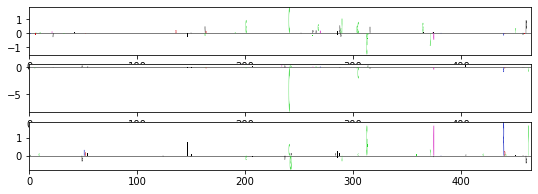

In [38]:
#Regularized. But pre-one standard error rule

figR, axR = plt.subplots(3)
figR.set_size_inches(9,3)
logomaker.Logo(Logo_dfOne,ax=axR[0])
logomaker.Logo(Logo_dfX,ax=axR[1])
logomaker.Logo(Logo_dfM,ax=axR[2])

In [39]:
print(reg.intercept_)
#print(min(reg.coef_[0]))



[-2.88573038  0.72425571 -2.9816175 ]


In [40]:
AllAvgScores=[AvgScoresOne,AvgScoresX,AvgScoresM]
AllAvgCoefs=[AvgCoefsOne,AvgCoefsX,AvgCoefsM]
AllNewCut=[NewCutOne,NewCutX,NewCutM]

In [ ]:
CinVec=[]
LinVec=[]

for i in np.arange(len(AllAvgScores)):
    AvgScores=AllAvgScores[i]
    AvgCoefs=AllAvgCoefs[i]
    NewCut=AllNewCut[i]
    #Xq=np.quantile(ZDat,0.95)
    #print(Xq)
    #NewCut Defined above
    #Allow other cutoff
    #Loop over new cutoff
    BestCin=0
    BestLin=0
    MinNP = len(reg.coefs_paths_[0][0][0][0])
    ModScore=-100*MinNP
    #NuPa=MinNP


    Cnu=[]
    LRnu=[]
    Scores=[]
    ParamV=[]


    SkipCon=0

    for a in np.arange(len(AvgScores)):
            for b in np.arange(len(AvgScores[a])):
                Take = AvgCoefs[a][b]
                SkipCon+=1
                #if SkipCon>10 : break
                #print(AvgScores[a][b])
                #cross_validate.cross_val_predict(reg,AlVal,GTV)
                #cross_validate(reg,AlVal,GTV)
                #OneOff=linear_model.LogisticRegression().fit()
                OneOff=reg
                OneOff.intercept=Take[len(Take)-1]
                OneOff.coef=Take[:-1]
                OneScore=OneOff.score(ValDat,GTV)


                #print(OneOff)
                #print(len(AvgCoefs[a][b]))

                if OneScore>= NewCut:

                    Take = AvgCoefs[a][b]
                    #print(len(Take),Take[0],Take[len(Take)-1])
                    NuPa = 0

                    #print(MinNP)
                    for t in Take:
                        if abs(t) > 0:
                            NuPa+=1

                    if NuPa < MinNP:
                        MinNP = NuPa
                        BestCin=a
                        BestLin=b
                        ModScore=OneScore

                    elif NuPa == MinNP:
                        if OneScore> ModScore:
                            #MinNP = NuPa
                            BestCin=a
                            BestLin=b
                            #Tie breaker if two have same number of parameters
                            ModScore=OneScore

                print("accept",AvgScores[a][b],C1[a],LR1[b],NuPa,MinNP)
                #print(len(Take),Take[0],Take[len(Take)-1])
    print("Final accept",ModScore,C1[BestCin],LR1[BestLin],MinNP)
    CinVec.append(BestCin)
    LinVec.append(BestLin)




accept -0.1943502824858757 0.099 0.1 87 87
accept -0.1943502824858757 0.099 0.11 86 86
accept -0.19661016949152543 0.099 0.12 85 85
accept -0.19887005649717515 0.099 0.13 84 84
accept -0.19887005649717515 0.099 0.13999999999999999 84 84
accept -0.19887005649717515 0.099 0.14999999999999997 81 81
accept -0.2033898305084746 0.099 0.15999999999999998 77 77
accept -0.2056497175141243 0.099 0.16999999999999998 77 77
accept -0.21468926553672316 0.099 0.17999999999999997 76 76
accept -0.2214689265536723 0.099 0.18999999999999995 76 76
accept -0.2214689265536723 0.099 0.19999999999999996 74 74
accept -0.22824858757062147 0.099 0.20999999999999996 74 74
accept -0.23502824858757063 0.099 0.21999999999999995 70 70
accept -0.24858757062146894 0.099 0.22999999999999995 68 68
accept -0.27570621468926554 0.099 0.23999999999999994 62 62
accept -0.30282485875706217 0.099 0.24999999999999992 59 59
accept -0.32316384180790964 0.099 0.2599999999999999 51 51
accept -0.3706214689265537 0.099 0.2699999999999

In [ ]:
#Save selected model, but do it in a looped way

#AllLogoDat=['A','B','C']
AllLogoDat={}

for w in np.arange(len(AllAvgScores)):
    PosX=[]
    BetaY=[]
    ResI=[]
    ResN=[]

    #Sweep=reg3.coef_[0]

    AvgCoefs=sum(reg.coefs_paths_[w])/len(reg.coefs_paths_[w])

    Sweep = AvgCoefs[CinVec[w]][LinVec[w]]
    #print(len(AllDat[0])/20)


    for i in np.arange(len(Sweep)):
        if abs(Sweep[i])>0:
            pos = math.floor(i/20) #Use 8 or 20
            if pos == len(AllDat[0])/20:
                break
                #Let's me skip the intercept term
            AAid = i % 20 #Use 8 or 20. Or this is a PCA ID
            #AAnam = residues[AAid]
            #print(Sweep[i],pos+1,residues[AAid])
            PosX.append((pos+1))
            RawBet=Sweep[i]
            LetHeight=0

            if RawBet > 0:
                LetHeight=np.exp(RawBet)-1.0
            else:
                LetHeight=-1.0*(np.exp(-1.0*RawBet)-1.0)

            #Undo Exponential Transform:
            #LetHeight=RawBet


            BetaY.append(LetHeight)
            ResI.append(AAid)
            ResN.append(residues[AAid])


    LogoDat=[]
    #loop over all positions
    for a in np.arange(len(AllDat[0])/20):
        SiteDat=[]
        #Loop over residues
        for b in residues:
            DatIt=(b,0.0)
            for c in np.arange(len(PosX)):
                if PosX[c]==(a+1) and b==ResN[c]:
                    DatIt=(b,BetaY[c])
            SiteDat.append(DatIt)
        LogoDat.append(SiteDat)
#print(AllLogoDat)
    AllLogoDat[w] = LogoDat # Must be in the loop!
#print(AllLogoDat)

In [ ]:
#print(AllLogoDat)

LogOne= MakeLogoDF(AllLogoDat[0])
LogX= MakeLogoDF(AllLogoDat[1])
LogM= MakeLogoDF(AllLogoDat[2])

In [ ]:
print(AllLogoDat)

In [ ]:
LogOne

In [ ]:
#LogOne.to_csv('LogoDatOne_202105312238.csv') 
#LogX.to_csv('LogoDatX_202105312238.csv') 
#LogM.to_csv('LogoDatM_202105312238.csv') 

In [ ]:
#Fix this multiclassifier code get ZDAT first








#Ending here

In [ ]:

MouseZP3_UnAlig = 'VKVECLEAELVVTVSRDLFGTGKLVQPGDLTLGSEGCQPRVSVDTDVVRFNAQLHECSSRVQMTKDALVYSTFLLHDPRPVSGLSILRTNRVEVPIECRYPR'
#RatZP3_Alig = '-VE-VECKE-----A---E---------------LVVT----VRRDL-FGTG-K-L----------------------------------------VQP-------GD-L---TL-G--SE--------G-CQ--------------P-LVAV----D-T--------DVVRLNAQLH-E----------------CSSG-------VQVT----------------------E-D----A-L-VYS--TF-LLHD-PRPV------------------------N-GLSILRTN--RV-E--V------PIE-CRY-P-R-------'
#RatZP3_Alig = '--VKVECLEA-ELVVT--VS---R------D--------------------L-F---GT----------------------------GK-LV--------------Q-PG-D---LT-L--G----SEG-C-------------------------Q--PRVS-VD---------T--D-VV--RFN-----A-Q-LH---------ECSSR--V--Q--M---T--KD-------------------AL---VYST-FL--LH-D----P------RPVS-----------G-----L---SI-LRTNR--VEVP-----IECRY-PR'
#This is the renewed alignment

RatZP3_Alig = '-VKVECLEA-E--L-------VV---------T---------V------S-RDLFG----T-------------------------------------GK-----------LV----Q--P---G------------------D---LT-L------------GSE-------------------------------------------------------------------------G-CQP--R-----V-S----VD--T--D---V-------------VRFNAQL------------HEC-------SSRV--Q---M---------T-----------------------K-D----AL-----VY-STF----LL---H---------------D--PR----P-V--S--G-LS------I------L---RTNR-----VEVP-----IECR-YPR'






MouseZP2ZPN1_UnAlig='GTLICDKDEVRIEFSSRFDMEKWNPSVVDTLGSEILNCTYALDLERFVLKFPYETCTIKVVGGYQVNIRVGDTTTDVRYKDDMYHFFCPAIQ'



#RatZP2ZPN_Alig='-GT-LICDK-----D---E---------------VRVE----FSSRF-D----M-E-KW-----------------------------------N-PSL--VD-TFGN-E---IS--------------------------------N-CTYA----L-DLEK-------FILKFPYE-T----------------C----------TIKV----------------------I-G----G-Y-QVN--IR-V--Q-DTNA------D-----------------V------SYK--DD-V--H------HFF-CPA-I-Q-------'
#RatZP2ZPN_Alig = '--GTLICDKD-EVRIE--FS---S------R--------------------F-D---M------------------------------------------------E-KW-N---PS-V--V----D-----------------------------T--LGSEILNC-TYAL--DL--E-RF--VLK-----F-P-YE---------TCTI------K--V---V--G-------------------------GYQV-NI--RV-G----D------TTT-----------------------D-VRYKD--DMYH-----FFCPA-IQ'
#New PSI-BLAST based alignment 

RatZP2ZPN_Alig = '-GTLICDKD-E--V-------RI---------E---------F------S-SRF---------------------------------------------------------DM----E--K---W------------------N---PS-V------------VDT-------------------------L---------G----SE-----------------------I------LN-CTY--A-----L-D-----------L-E-R-------------FVLKFPY------------ETC-------T--I--K---V---------V-------------------------------G-----GY-QVN----IR---V---------------G--DT----T----------T------D------V---RYKD-----DMYH-----FFCP-AIQ'


In [ ]:
#Identify gap only sites in both

BothGap=[]
FineSite=[]

for i in np.arange(len(RatZP3_Alig)):
    if RatZP3_Alig[i]=='-' and RatZP2ZPN_Alig[i] == '-' :
        BothGap.append(i)
    else:
        #print(sum(Logo_df.iloc[i,])) #Not I lose one of my parameters because it falls in a gap
        FineSite.append(i)

        
CleanLogoOne=LogOne.iloc[FineSite,:].reset_index(drop=True)
CleanLogoX=LogX.iloc[FineSite,:].reset_index(drop=True)
CleanLogoM = LogM.iloc[FineSite,:].reset_index(drop=True)

CleanLogoOne

In [ ]:
#max(CleanLogoM)

In [ ]:
#Write LOGOs




#CleanLogoOne.to_csv('CleanLogoOne_202204242012.csv',index = False)
#CleanLogoX.to_csv('CleanLogoX_202204242012.csv',index = False)
#CleanLogoM.to_csv('CleanLogoM_202204242012.csv',index = False)










In [ ]:
LogoDat=[]
#loop over all positions
for a in np.arange(len(AllDat[0])/20):
    SiteDat=[]
    #Loop over residues
    for b in residues:
        DatIt=(b,0.0)
        for c in np.arange(len(PosX)):
            if PosX[c]==(a+1) and b==ResN[c]:
                DatIt=(b,BetaY[c])
        SiteDat.append(DatIt)
    LogoDat.append(SiteDat)
            

In [ ]:
#draw_logo(LogoDat)






In [ ]:
# load ww information matrix
fig, ax = plt.subplots()
fig.set_size_inches(7,2)
ww_df = logomaker.get_example_matrix('ww_information_matrix',
                                     print_description=False)

# create Logo object
#logomaker.Logo(ww_df)


#print(ww_df.columns)
print(ww_df.index)

Logo_df = pandas.DataFrame(0,columns=ww_df.columns,index=np.arange(len(LogoDat)))


for i in np.arange(len(LogoDat)):
    #Make Row
    NuRow=[]
    for j in np.arange(len(LogoDat[i])):
        NuRow.append(LogoDat[i][j][1])
        Logo_df.iloc[i,j] = LogoDat[i][j][1]
    #print(LogoDat[i])
    #print(NuRow)
    #Row_df=pandas.DataFrame(np.transpose(NuRow),columns=residues)
    #Logo_df.append(NuRow,ignore_index=True)
    #if i >10:
       # break
        

#print(ww_df.head())
#print(Logo_df)
logomaker.Logo(Logo_df,color_scheme='hydrophobicity',ax=ax)
#fig.savefig('OneRow_PsuedoLogo_202104141508.png',dpi=600)

In [ ]:
#Logo_df.to_csv('PseudoLogo_UseDat_202105172136_FirstvOther.csv') 

In [ ]:
len(Logo_df)

#Logo2=np.split(Logo_df, 2)

In [ ]:
'''
fig2, ax2 = plt.subplots(2,1)



fig2.set_size_inches(7,2)

#print(ax2[0].get_yaxis())

#fig.subplots_adjust(hspace=0.05, left=0.1, right=0.90, bottom=0.10, top=0.9)


logomaker.Logo(Logo2[0],width=1,baseline_width=1,font_name='Arial',color_scheme='hydrophobicity',ax=ax2[0])
logomaker.Logo(Logo2[1],width=1,baseline_width=1,font_name='Arial',color_scheme='hydrophobicity',ax=ax2[1])

ax2[0].set_ylim(-0.25,1.25)
ax2[1].set_ylim(-0.25,1.25)

fig.subplots_adjust(hspace=0.05, left=0.1, right=0.90, bottom=0.10, top=0.9)

#fig2.savefig('TwoRow_PsuedoLogo_202104141508.png',dpi=600)
'''


In [ ]:
# DO raw values
Logo_df

In [ ]:
reg.coef

In [ ]:


MouseZP3_UnAlig = 'VKVECLEAELVVTVSRDLFGTGKLVQPGDLTLGSEGCQPRVSVDTDVVRFNAQLHECSSRVQMTKDALVYSTFLLHDPRPVSGLSILRTNRVEVPIECRYPR'
#RatZP3_Alig = '-VE-VECKE-----A---E---------------LVVT----VRRDL-FGTG-K-L----------------------------------------VQP-------GD-L---TL-G--SE--------G-CQ--------------P-LVAV----D-T--------DVVRLNAQLH-E----------------CSSG-------VQVT----------------------E-D----A-L-VYS--TF-LLHD-PRPV------------------------N-GLSILRTN--RV-E--V------PIE-CRY-P-R-------'
#RatZP3_Alig = '--VKVECLEA-ELVVT--VS---R------D--------------------L-F---GT----------------------------GK-LV--------------Q-PG-D---LT-L--G----SEG-C-------------------------Q--PRVS-VD---------T--D-VV--RFN-----A-Q-LH---------ECSSR--V--Q--M---T--KD-------------------AL---VYST-FL--LH-D----P------RPVS-----------G-----L---SI-LRTNR--VEVP-----IECRY-PR'
#This is the renewed alignment

RatZP3_Alig = '-VKVECLEA-E--L-------VV---------T---------V------S-RDLFG----T-------------------------------------GK-----------LV----Q--P---G------------------D---LT-L------------GSE-------------------------------------------------------------------------G-CQP--R-----V-S----VD--T--D---V-------------VRFNAQL------------HEC-------SSRV--Q---M---------T-----------------------K-D----AL-----VY-STF----LL---H---------------D--PR----P-V--S--G-LS------I------L---RTNR-----VEVP-----IECR-YPR'






MouseZP2ZPN1_UnAlig='GTLICDKDEVRIEFSSRFDMEKWNPSVVDTLGSEILNCTYALDLERFVLKFPYETCTIKVVGGYQVNIRVGDTTTDVRYKDDMYHFFCPAIQ'



#RatZP2ZPN_Alig='-GT-LICDK-----D---E---------------VRVE----FSSRF-D----M-E-KW-----------------------------------N-PSL--VD-TFGN-E---IS--------------------------------N-CTYA----L-DLEK-------FILKFPYE-T----------------C----------TIKV----------------------I-G----G-Y-QVN--IR-V--Q-DTNA------D-----------------V------SYK--DD-V--H------HFF-CPA-I-Q-------'
#RatZP2ZPN_Alig = '--GTLICDKD-EVRIE--FS---S------R--------------------F-D---M------------------------------------------------E-KW-N---PS-V--V----D-----------------------------T--LGSEILNC-TYAL--DL--E-RF--VLK-----F-P-YE---------TCTI------K--V---V--G-------------------------GYQV-NI--RV-G----D------TTT-----------------------D-VRYKD--DMYH-----FFCPA-IQ'
#New PSI-BLAST based alignment 

RatZP2ZPN_Alig = '-GTLICDKD-E--V-------RI---------E---------F------S-SRF---------------------------------------------------------DM----E--K---W------------------N---PS-V------------VDT-------------------------L---------G----SE-----------------------I------LN-CTY--A-----L-D-----------L-E-R-------------FVLKFPY------------ETC-------T--I--K---V---------V-------------------------------G-----GY-QVN----IR---V---------------G--DT----T----------T------D------V---RYKD-----DMYH-----FFCP-AIQ'

#This is really a mouse.

In [ ]:
#UnReg=pandas.read_csv('Unreg_LogoDat_202104141507.csv')
#UnReg

In [ ]:
UnReg = R1

In [ ]:
#Identify gap only sites in both

BothGap=[]
FineSite=[]

for i in np.arange(len(RatZP3_Alig)):
    if RatZP3_Alig[i]=='-' and RatZP2ZPN_Alig[i] == '-' :
        BothGap.append(i)
    else:
        #print(sum(Logo_df.iloc[i,])) #Not I lose one of my parameters because it falls in a gap
        FineSite.append(i)

        
CleanLogo=Logo_df.iloc[FineSite,:].reset_index(drop=True) 
CleanUnReg=UnReg.iloc[FineSite,:].reset_index(drop=True) 
CleanLogo

In [ ]:
print(max(CleanLogo.max()),max(CleanUnReg.max()),min(CleanLogo.min()),min(CleanUnReg.min()))
print(CleanUnReg)

In [ ]:
fig3, ax3 = plt.subplots(2)
fig3.set_size_inches(7,2)



logomaker.Logo(CleanUnReg, ax =ax3[0], color_scheme='skylign_protein')
logomaker.Logo(CleanLogo, ax =ax3[1], color_scheme='skylign_protein')

ax3[0].set_ylim(-1.5,1.5)
ax3[1].set_ylim(-1.5,1.5)
ax3[0].set_xticks([])
fig3.tight_layout()

fig3.subplots_adjust(hspace=0.05)
#fig3.savefig('Clean_PsuegoLogo_202104141738.png',dpi=600)

In [ ]:
#Convert python indexes for Modular ZPN

pos=0

PosMap_Mod={}

for i in np.arange(len(RatZP3_Alig)):
    if RatZP3_Alig[i]=='-':
        continue
    else:
        #print(i,pos)
        PosMap_Mod[i+1]=(pos+1)
        pos+=1
        
#PosMap_Mod

In [ ]:
#OutParamMod=open("ValList_ModZPN_20210517XXXX_FreevOther.txt",'w')


for i in np.arange(len(BetaY)):
    if BetaY[i]<=0:
        continue
    print(BetaY[i],PosMap_Mod[PosX[i]]+371,ResN[i]) #Added 371 to match pdb
    PlaceId=PosMap_Mod[PosX[i]]+371
    OutParamMod.write(str(BetaY[i])+'\t'+str(PlaceId)+'\n')
OutParamMod.close()

In [ ]:
#Convert Res positions for Free


print(len(MouseZP2ZPN1_UnAlig),len(RatZP2ZPN_Alig.replace('-',''))) #These match! Makes my job easier

In [ ]:
pos=0

PosMap_Free={}

for i in np.arange(len(RatZP2ZPN_Alig)):
    if RatZP2ZPN_Alig[i]=='-':
        continue
    else:
        #print(i,pos)
        PosMap_Free[i+1]=(pos+1+46)#Add 46 to match pdb 
        pos+=1
#PosMap_Free

In [ ]:
#OutParamFree=open("ValList_FreeZPN_20210517_FreevOtherX.txt",'w')




for i in np.arange(len(BetaY)):
    if BetaY[i]>=0:
        continue #Now I am only doing Frees
    if PosX[i] in PosMap_Free.keys():
        #print(BetaY[i],PosMap_Free[PosX[i]],ResN[i]) 
        PlaceId=PosMap_Free[PosX[i]] #ALready added the 46 to match my pdb file (Mouse ZP2_ZPN1)
        OutParamFree.write(str(BetaY[i])+'\t'+str(PlaceId)+'\n')
        
OutParamFree.close()

In [ ]:
#unreg = linear_model.LogisticRegressionCV(penalty='elasticnet',solver='saga',l1_ratios=[],max_iter=10000,Cs=C1,scoring='neg_mean_squared_error',multiclass='ovr').fit(AllDat,GT)


In [ ]:
#print(LogoDat)

Data = LogoDat
#def LogoManual(Data):
fig, ax = plt.subplots(figsize=(3.5,3), ncols=1, nrows=1)
#ax[0,0]
#ax[0,1].set(xlim=(150,160))



#plt.figure()
#plt.xlim(150,160)
#plt.ylim(0,2)
#print(Data[0][0])
#Loop over positions
for i in np.arange(len(Data)):
    Take= sorted(Data[i],key=itemgetter(1)) #Need itemgetter for this
    #print(Take)
    CurHei=0.0
    for j in np.arange(len(Take)):
        if Take[j][1] <=0:
            continue 
            #Not worrying about the negatives right now
            #Plot Both positive and Negative


        derp=2*3
        if Take[j][0] =='P':
            ax.text((i+1.0),CurHei,Take[j][0],fontstretch=0, fontsize=20)
        CurHei+=Take[j][1]
        #print(Data[i][j])
#plt.show()
ax.set(xlim=(150,160), ylim=(0,2))
#eturn fig
    
    
#ogoManual(LogoDat)


In [ ]:
#Look at params
reg.coef_[0] #This is the main answer

for i in np.arange(len(reg.coef_[0])):
    if abs(reg.coef_[0][i])>0:
        pos = math.floor(i/20) #Use 8 or 20
        AAid = i % 20 #Use 8 or 20. Or this is a PCA ID
        #AAnam = residues[AAid]
        print(reg.coef_[0][i],pos,residues[AAid])


In [ ]:
#COnvert Data to Useable Format
print(len())

In [ ]:
2*3

In [ ]:
HeightsMod = [np.exp(b)-1 if b > 0 else 0 for b in BetaList]
HeightsFree = [np.exp(-b)-1 if b < 0 else 0 for b in BetaList]
max(HeightsMod)
#np.exp(2.64)-1

In [ ]:
#Look Into Psuedologo